# Lab 02.a - Week 3
## Early Fire Detection with Multi-Layer Perceptron

## **Challenge 01**


First, let's load the saved NumPy array data from your previous lab and complete the sections marked with `TODO X` comments.

In [41]:
import os
import numpy as np
from tensorflow.python.keras.optimizer_v1 import adamax
from tensorflow.python.keras.saving.saved_model.load import layers_module

# TODO 01  - Load the data from LAB 01

save_path = '../Lab1/processed_data/'
X = np.load(save_path + 'X.npy')
X_test = np.load(save_path + 'X_test.npy')
y = np.load(save_path + 'y.npy')
y_test = np.load(save_path + 'y_test.npy')



## **Challenge 02**

Now, let’s build our multi-layer perceptronmodel to detect wildfires!

In [60]:
len(X)

4204

In [64]:
#TODO 01 - Let’s begin with a simple Multi-Layer Perceptron (MLP) model.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam

input_shape = [100,100,3]

model = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(1, activation='sigmoid')  # Use a single output neuron with a sigmoid activation function for binary classification.
])

# Display the model architecture to visualise its layers and parameters.
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │    30,721,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,722,049 (117.20 MB)

 Trainable params: 30,722,049 (117.20 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
#TODO 02 - Let’s compile our MLP model with an appropriate loss function, optimizer, and evaluation metrics.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.3)
model.compile(
    optimizer= optimizer,
    loss='binary_crossentropy',  # Use a loss function compatible with binary classification problems.
    metrics=['accuracy']
)



In [76]:
#TODO 03 - Let’s train our MLP model using the training data while monitoring its performance on the validation set.
import time
start_time = time.time()

history = model.fit(X, y, epochs=4, batch_size=128, validation_split=0.2, verbose=1)

end_time = time.time()
training_time = end_time - start_time

print("Training Time (s): ", training_time)

Epoch 1/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.7609 - loss: 0.4548 - val_accuracy: 0.7574 - val_loss: 0.8929
Epoch 2/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7646 - loss: 0.4567 - val_accuracy: 0.7788 - val_loss: 0.8462
Epoch 3/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7745 - loss: 0.4283 - val_accuracy: 0.7800 - val_loss: 0.8842
Epoch 4/4
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7930 - loss: 0.4209 - val_accuracy: 0.7907 - val_loss: 0.8284
Training Time (s):  8.501725912094116


In [77]:
#TODO 04 - Evaluate the MLP model on the test data to assess its performance.
model.evaluate(X_test, y_test) # Evaluate the model using data that it has never seen before to ensure an unbiased assessment of its generalisation ability.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5444 - loss: 0.6665


[0.666400134563446, 0.5510203838348389]

Let’s visualise the training and validation curves to assess the model's performance. Analyse the curves to determine if there is overfitting or underfitting.


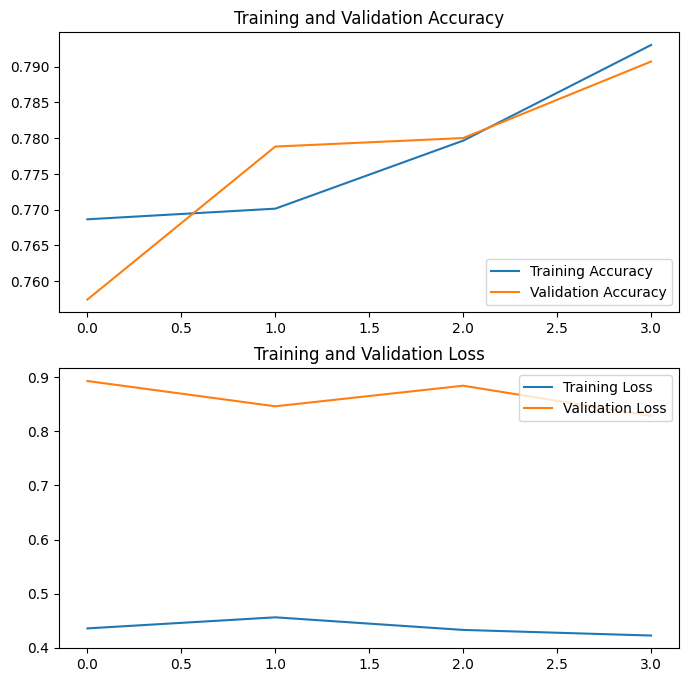

In [78]:
import matplotlib.pyplot as plt

def Plot_acc_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(len(loss))

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()
Plot_acc_loss(history)

Now, let’s evaluate our model using classification metrics such as accuracy, precision, recall, and F1-score to gain deeper insights into its performance.

In [48]:
from sklearn.metrics import classification_report
pred = model.predict(X_test)
binary_predictions = [1 if p > 0.5 else 0 for p in pred]


print(classification_report(y_test, binary_predictions))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x130ea5d00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.49      1.00      0.66        24

    accuracy                           0.4

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

And let’s analyse the confusion matrix to understand the model's performance in correctly and incorrectly classifying each class.

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
#TODO 05 - Complete the function to calculate and display the classification metrics and the confusion matrix for the model's predictions.


def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(..., ...)

  # Define class labels
  class_labels = [..., ...]

  # Create a DataFrame
  cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

  plt.figure(figsize=(8,6))
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title('Confusion Matrix')
  plt.show()
plot_confusion_matrix(..., ...)



InvalidParameterError: The 'y_true' parameter of confusion_matrix must be an array-like. Got Ellipsis instead.

Finally, let’s visualise the images along with their predicted and true labels to better understand the model’s performance.

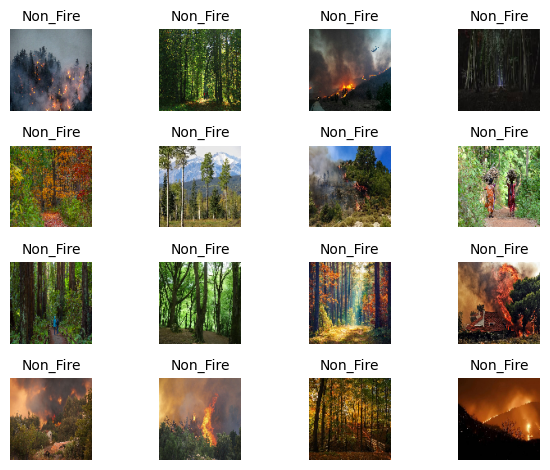

In [79]:
import random
reverse_label_map = {
    0:"Fire",1:"Non_Fire"
}
def view_grid_figures(predictions):
  combined_list = list(zip(X_test, predictions))
  Samples = random.sample(combined_list, 16)

  total_images = 16
  grid_size = (4,4)

  fig, axes = plt.subplots(grid_size[0], grid_size[1])
  axes = axes.flatten()

  for idx in range(total_images):
      ax = axes[idx]
      ax.axis('off')


      img = Samples[idx][0]
      label = Samples[idx][1]
      ax.imshow(img)

      ax.set_title(reverse_label_map[label], fontsize=10)

  plt.tight_layout()
  plt.show()

view_grid_figures(binary_predictions)

Analysing Model Inference Time

In [80]:
inference_times = []

# Perform inference and record times
for i in range(len(X_test)):
    start_time = time.time()
    _ = model.predict(np.array([X_test[i,:,:,:]]), verbose=0)
    end_time = time.time()
    inference_times.append(end_time - start_time)

# Calculate average and standard deviation
avg_time = np.mean(inference_times)
std_time = np.std(inference_times)

print(f"Training Time: {training_time} s")
print(f'Average Inference Time over {len(X_test)} runs: {avg_time*1000:.2f} ms')
print(f'Standard Deviation: {std_time*1000:.2f} ms')

Training Time: 8.501725912094116 s
Average Inference Time over 49 runs: 28.30 ms
Standard Deviation: 4.76 ms
